In [8]:
import pandas as pd

keyscore = {}

for year in ['2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']:
    df = pd.read_excel('./result/lda_total_keyword_{}.xlsx'.format(year))
    for t in ['1','2','3','4']:
        get_score(t, keyscore, df, year)

keyscore
    

{'display': {'2021': 100,
  '2020': 100,
  '2019': 100,
  '2018': 100,
  '2017': 100,
  '2016': 99,
  '2015': 100,
  '2014': 98,
  '2013': 95,
  '2012': 89,
  '2011': 94},
 'device': {'2021': 99,
  '2020': 99,
  '2019': 100,
  '2018': 99,
  '2017': 99,
  '2016': 100,
  '2015': 100,
  '2014': 100,
  '2013': 100,
  '2012': 100,
  '2011': 100},
 'layer': {'2021': 98,
  '2020': 97,
  '2019': 96,
  '2018': 97,
  '2017': 97,
  '2016': 98,
  '2015': 100,
  '2014': 99,
  '2013': 100,
  '2012': 98,
  '2011': 99},
 'present': {'2021': 97,
  '2020': 90,
  '2019': 87,
  '2018': 94,
  '2017': 92,
  '2016': 98,
  '2015': 95,
  '2014': 98,
  '2013': 90,
  '2012': 99,
  '2011': 99},
 'light': {'2021': 96,
  '2020': 95,
  '2019': 91,
  '2018': 94,
  '2017': 96,
  '2016': 94,
  '2015': 92,
  '2014': 95,
  '2013': 98,
  '2012': 91,
  '2011': 98},
 'substrate': {'2021': 95,
  '2020': 95,
  '2019': 98,
  '2018': 98,
  '2017': 98,
  '2016': 97,
  '2015': 99,
  '2014': 97,
  '2013': 97,
  '2012': 95,
  '2011

In [7]:
def get_score(t, keyscore, df, year):

    score = 100
    for i, key in enumerate(df['topic{} key'.format(t)]):
        if key not in keyscore:
            keyscore[key] = {}
        if year in keyscore[key]:
            if keyscore[key][year] < score - i:
                 keyscore[key][year] = score - i
        else:
            keyscore[key][year] = score - i

In [56]:
# import pandas as pd

# keyscore = {}

# for year in ['2021','2020','2019','2018','2017','2016','2015','2014']:
#     df = pd.read_excel('./result/lda_total_keyword_{}.xlsx'.format(year))
#     for t in ['1','2','3','4']:
#         get_score(t, keyscore, df, year)

# keyscore

{'device': {'2021': 50,
  '2020': 50,
  '2019': 49,
  '2018': 49,
  '2017': 50,
  '2016': 49,
  '2015': 50,
  '2014': 50},
 'system': {'2021': 49,
  '2020': 49,
  '2019': 49,
  '2018': 50,
  '2017': 50,
  '2016': 50,
  '2015': 50,
  '2014': 49},
 'display': {'2021': 48,
  '2020': 44,
  '2019': 50,
  '2018': 50,
  '2017': 50,
  '2016': 50,
  '2015': 48,
  '2014': 47},
 'configured': {'2021': 47,
  '2020': 46,
  '2019': 46,
  '2018': 42,
  '2017': 43,
  '2016': 46,
  '2015': 42,
  '2014': 46},
 'control': {'2021': 46,
  '2020': 45,
  '2019': 43,
  '2018': 48,
  '2017': 44,
  '2016': 47,
  '2015': 39,
  '2014': 41},
 'user': {'2021': 45,
  '2020': 46,
  '2019': 45,
  '2018': 45,
  '2017': 44,
  '2016': 46,
  '2015': 46,
  '2014': 45},
 'systems': {'2021': 46,
  '2020': 44,
  '2019': 46,
  '2018': 47,
  '2017': 46,
  '2016': 45,
  '2015': 45,
  '2014': 42},
 'devices': {'2021': 43,
  '2020': 21,
  '2019': 33,
  '2018': 25,
  '2017': 24,
  '2016': 33,
  '2015': 36,
  '2014': 32},
 'vehicle'

In [9]:
score_df = pd.DataFrame(keyscore).T.sort_values(by = '2021', ascending = False)
score_df= score_df.fillna(0.0)


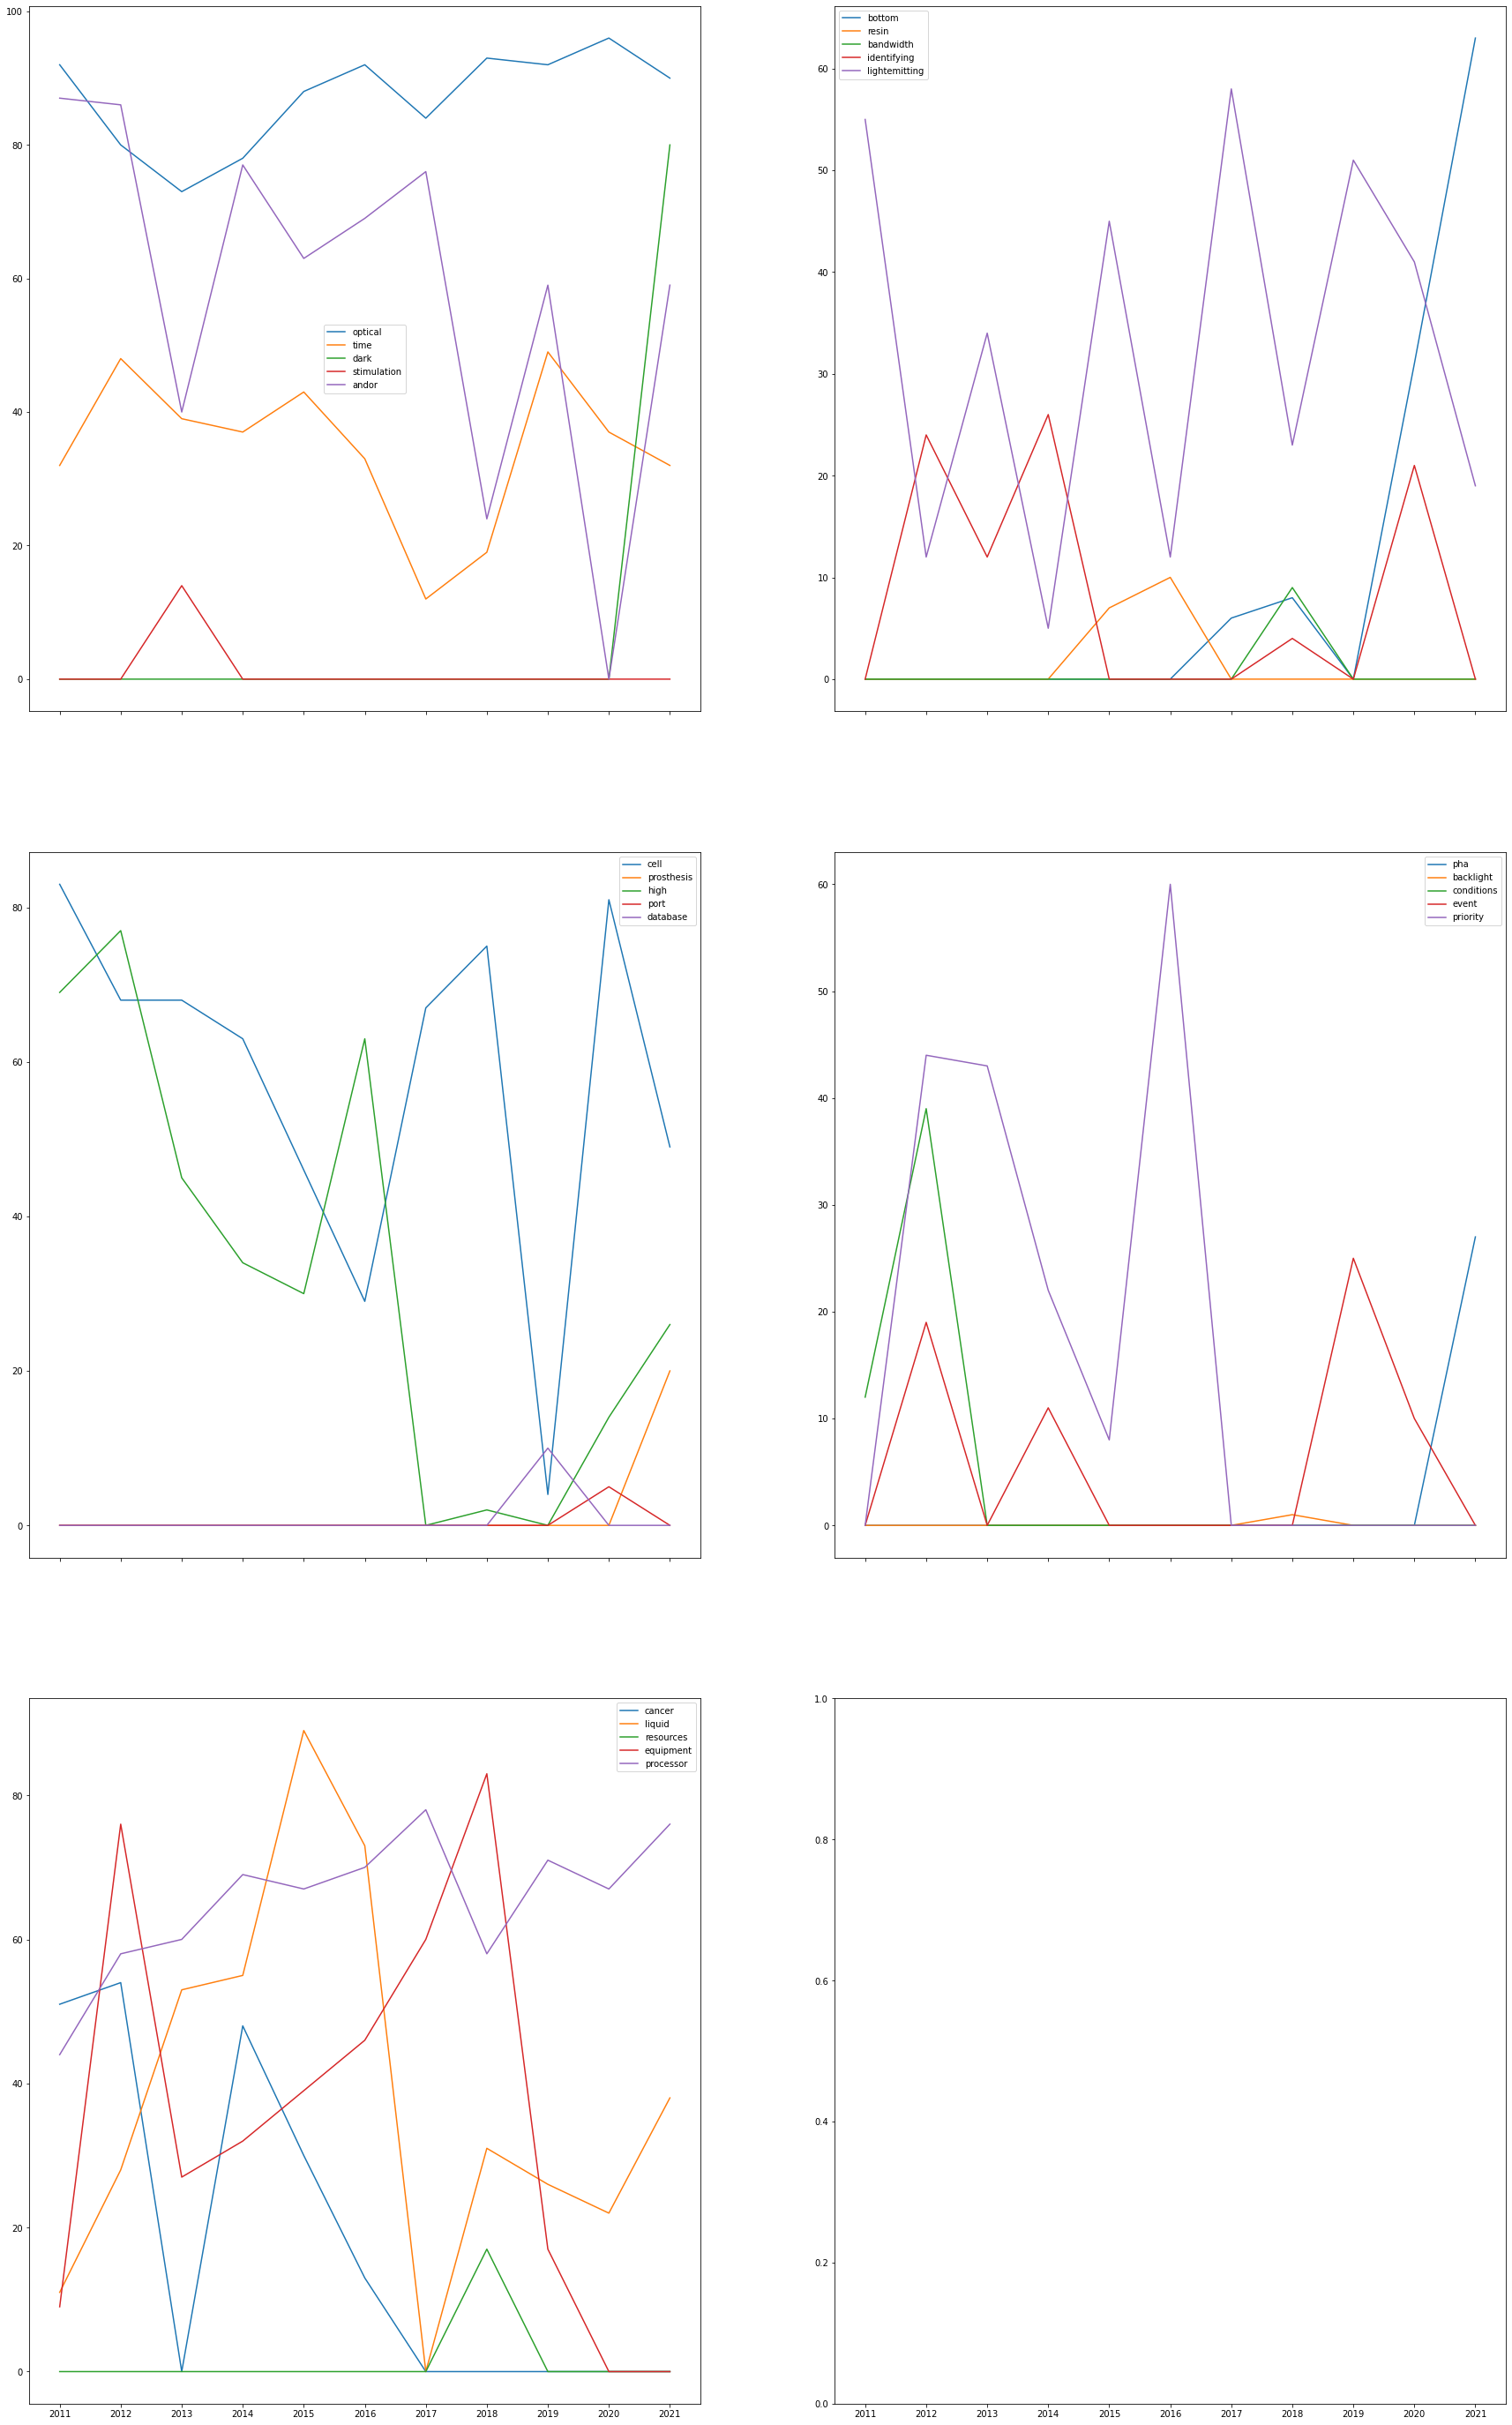

In [10]:
import matplotlib.pyplot as plt
import matplotlib


fig, axes = plt.subplots(3, 2, figsize=(30, 50),sharex=True)
axes = axes.flatten()

sdf = score_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']].sample(frac=1, replace=True, random_state=1)

i = 0
for i in range(5):
    for data in sdf[i*5:i*5+5].iloc:
        axes[i].plot(data.index, data, label = data.name)
        axes[i].legend()
        axes[i].set_xticks(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])




In [12]:
score_df = score_df.reset_index()
score_df.to_excel('./result/newscore!!!.xlsx', index = False)